In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import sys
import requests

In [2]:
%reload_ext sql
%matplotlib inline

C:\Anaconda2\envs\py35\lib\site-packages\IPython\config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
C:\Anaconda2\envs\py35\lib\site-packages\IPython\utils\traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [3]:
query = "select * from currency_info"
df_ci = pd.read_sql_query(query, 'postgresql://postgres:@192.168.99.100:5432/crypto_data')
#df_ci = df_bc.set_index('time')

In [4]:
query = "select * from btc_prices"
df_bc = pd.read_sql_query(query, 'postgresql://postgres:@192.168.99.100:5432/crypto_data')
df_bc = df_bc.set_index('time')

In [5]:
df_rates = pd.DataFrame.from_csv("../src/data/fx_rates.csv")
df_rates["time"] = pd.to_datetime(df_rates["time"])
df_rates = df_rates.set_index('time')

In [6]:
df_bc.index.tz = None
df_rates.index.tz = None
df_merged = df_bc.join(df_rates)

### Now we convert every currency we have to dollar

In [8]:
df_rates.columns

Index(['USDLTL', 'USDPHP', 'USDHKD', 'USDCHF', 'USDBGN', 'USDHRK', 'USDCNY',
       'USDJPY', 'USDPLN', 'USDNZD', 'USDLVL', 'USDZAR', 'USDAUD', 'USDIDR',
       'USDSEK', 'USDINR', 'USDTHB', 'USDMXN', 'USDEUR', 'USDCAD', 'USDHUF',
       'USDCZK', 'USDBRL', 'USDRON', 'USDILS', 'USDKRW', 'USDTRY', 'USDGBP',
       'USDDKK', 'USDSGD', 'USDNOK', 'USDRUB', 'USDMYR', 'USDUSD', 'USDEEK'],
      dtype='object')

In [9]:
df_merged.currency_code.unique()

array(['USD', 'EUR', 'JPY', 'CNY', 'GBP', 'AUD', 'CAD', 'ILS', 'INR',
       'SGD', 'RUB', 'HKD', 'ZAR', 'PLN', 'KRW', 'UAH', 'GOLD'], dtype=object)

In [10]:
def convert_to_usd(df_with_rate,cur_sym):
    df_cur = df_with_rate[df_with_rate["currency_code"]==cur_sym]
    df_new = df_with_rate.copy()
    
    convert_list = ["closing_price","highest_price",
                    "lowest_price","opening_price",
                   "volume_currency"]
    
    for item in convert_list:
        df_new[item+"_"+cur_sym+"inUSD"] = df_cur[item] / df_cur["USD"+cur_sym]
    
    return df_new

In [11]:
df_merged.columns

Index(['opening_price', 'highest_price', 'lowest_price', 'closing_price',
       'volume_btc', 'volume_currency', 'currency_code', 'USDLTL', 'USDPHP',
       'USDHKD', 'USDCHF', 'USDBGN', 'USDHRK', 'USDCNY', 'USDJPY', 'USDPLN',
       'USDNZD', 'USDLVL', 'USDZAR', 'USDAUD', 'USDIDR', 'USDSEK', 'USDINR',
       'USDTHB', 'USDMXN', 'USDEUR', 'USDCAD', 'USDHUF', 'USDCZK', 'USDBRL',
       'USDRON', 'USDILS', 'USDKRW', 'USDTRY', 'USDGBP', 'USDDKK', 'USDSGD',
       'USDNOK', 'USDRUB', 'USDMYR', 'USDUSD', 'USDEEK'],
      dtype='object')

In [12]:
for cur in df_bc.currency_code.unique():
    if cur not in ["GOLD","UAH"]:
        df_merged = convert_to_usd(df_merged,cur)
    

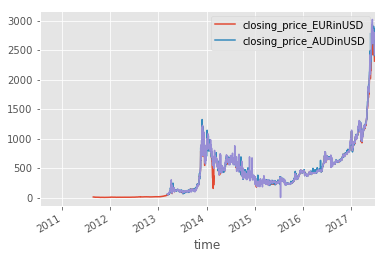

In [13]:
ax1 = df_merged.closing_price_EURinUSD.plot()
df_merged.closing_price_AUDinUSD.plot()
df_merged.closing_price_CADinUSD.plot()

lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines[:2], labels[:2], loc='best')

0 closing_price_EURinUSD
1 closing_price_PLNinUSD
2 closing_price_KRWinUSD
3 closing_price_CADinUSD
4 closing_price_AUDinUSD
5 closing_price_GBPinUSD


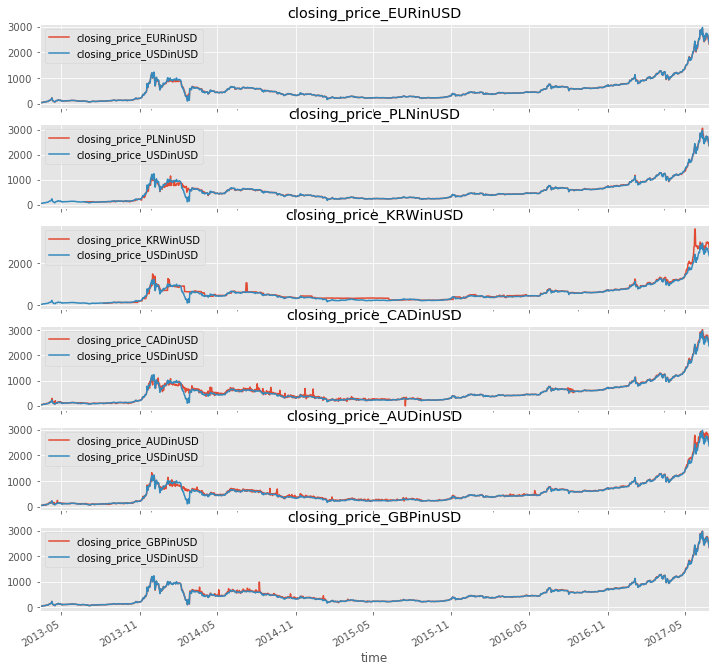

In [41]:
fig, axes = plt.subplots(nrows=6, ncols=1)
for i, c in enumerate(["closing_price_EURinUSD","closing_price_PLNinUSD","closing_price_KRWinUSD",
                      "closing_price_CADinUSD","closing_price_AUDinUSD","closing_price_GBPinUSD"]):
    print(i,c)
    df_merged[c].dropna().plot(ax=axes[i], figsize=(15, 15), title=c,sharex=True)
    df_merged['closing_price_USDinUSD'].dropna().plot(ax=axes[i], figsize=(12, 12), title=c,sharex=True)
    ax =axes[i]
    ax.set_xlim([734938.5,736507])
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines[:2], labels[:2], loc='best')
#plt.savefig('EU1.png', bbox_inches='tight')

In [27]:
ax.get_ylim()

(-149.31740340022444, 3136.754691404713)

In [32]:
limits

(733970.0, 736507.0)

In [29]:
limits = ax.get_xlim()

In [30]:
(limits[0] + limits[1])/2.

735238.5

In [22]:
ax0.get_xlim()
ax0.set_xlim([200000,736507])

(200000, 736507)

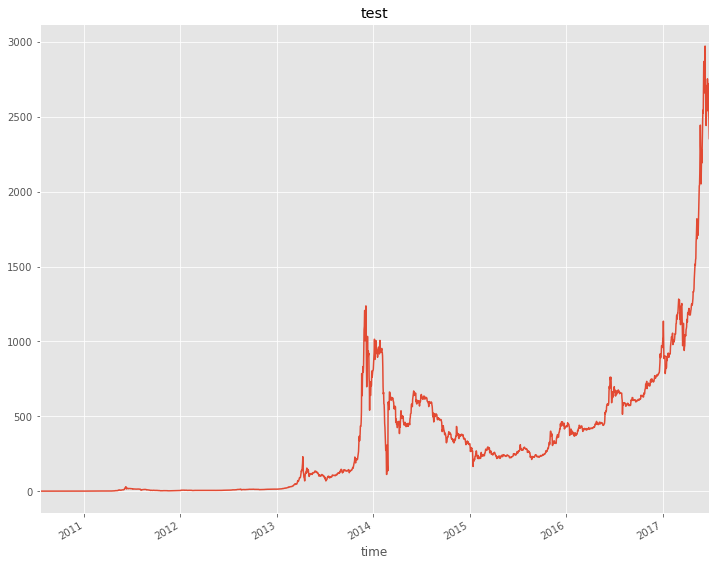

In [15]:
df_merged['closing_price_USDinUSD'].plot(kind=,figsize=(12, 10), title="test")

In [54]:
new_ratio = (df_merged.closing_price_USDinUSD - df_merged.closing_price_EURinUSD)/df_merged.closing_price_USDinUSD
new_total = df_merged.closing_price_USDinUSD - df_merged.closing_price_EURinUSD

In [ ]:
df_merged_eu.

In [75]:
np.average(new_ratio.dropna())

-0.0016875332663442465

In [32]:
df_merged_eu = df_merged[df_merged["currency_code"]=='EUR']
df_merged_usd = df_merged[df_merged["currency_code"]=='USD']
df_merged_jp = df

In [35]:
df_bc.columns

Index(['opening_price', 'highest_price', 'lowest_price', 'closing_price',
       'volume_btc', 'volume_currency', 'currency_code'],
      dtype='object')

In [33]:
df_merged_eu["closing_price_eu"]=df_merged_eu["closing_price"] / df_merged_eu["USDEUR"]

C:\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


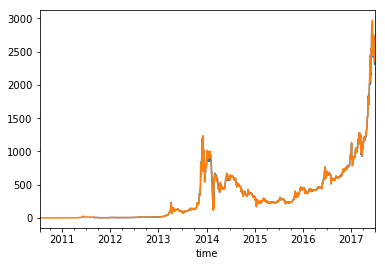

In [34]:
df_merged_eu.closing_price_eu.plot()
df_merged_usd.closing_price.plot()

In [15]:
df_bc_usd = df_bc[df_bc["currency_code"]=='USD']

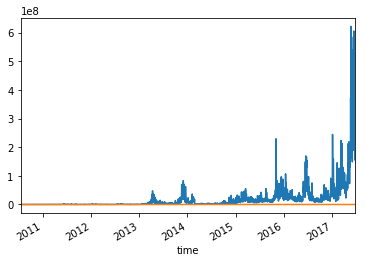

In [19]:
df_bc_usd.volume_currency.plot()
df_bc_usd.closing_price.plot()

In [24]:
df_rates["time"] = pd.to_datetime(df_rates["time"])

In [ ]:
print(df_rates.time.values[0],df_bc.time.values[0])

In [25]:
df_bc_rates = df_bc.merge(df_rates,on='time')

TypeError: Argument 'values' has incorrect type (expected numpy.ndarray, got Index)

In [ ]:
USDEUR_rate = df_rates["EUR"].values

In [ ]:
df_bc

In [ ]:
df_rates.EUR.plot()

In [ ]:
df_rates.columns

In [ ]:
for cur_node in df_bc.currency_code.unique():
    print(cur_node, cur_node in df_rates.columns)

In [ ]:
df_uah = df_bc[df_bc['currency_code']=='UAH']
df_uah = df_uah.set_index('time')
#df_uah.closing_price.plot()
#df_uah.volume_btc.plot()
df_uah.volume_btc.plot()

In [ ]:
df_usd = df_bc[df_bc['currency_code']=='USD']
df_usd = df_usd.set_index('time')
#df_usd.closing_price.plot()
df_usd.volume_currency.plot()
#df_uah.volume_btc.plot()

In [ ]:
df_usd.closing_price.plot()

In [ ]:
len(df_bc[df_bc['currency_code']=='UAH'])

In [ ]:
len(df_bc[df_bc['currency_code']=='USD'])

In [ ]:
rates = x["rates"]
rates["date"] = x["date"]

In [ ]:
df = pd.DataFrame(columns=rates.keys())

In [ ]:
df

In [ ]:
row = 1
for col in df.columns:
    #print(col, rates[col])
    df.loc[row,col] = rates[col]

In [ ]:
df

In [ ]:
rates.keys()

In [ ]:
rates.values()

In [ ]:
rates.items()

In [ ]:
base_url = 'http://api.fixer.io/latest'
base_currencies = ['GBP', 'USD', 'EUR']
rate_in = 'USD'

for currency in base_currencies:
    rate = get_currency_rate(currency, rate_in)
    print(currency, rate)

In [ ]:
query = "select * from btc_prices"
df_bc = pd.read_sql_query(query, 'postgresql://postgres:@192.168.99.100:5432/crypto_data')

In [ ]:
len(df_bc.time.unique())

In [ ]:
start_row = 0
for date in df_bc.time.unique():
    

In [ ]:
test_date = df_bc['time'][0]

In [ ]:
test_date

In [ ]:
test_date.strftime('%Y-%m-%d')

In [ ]:
df_bc

In [ ]:
test_date

In [ ]:
pd.to_datetime(str(test_date))

In [ ]:
df_bc.currency_code.unique()